<a href="https://colab.research.google.com/github/MinSeok1o28/MS_K/blob/main/DataScienceProject_Team_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터사이언스 팀프로젝트 6조

In [ ]:
#!apt -qq -y install fonts-nanum
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 문제정의
- 현실적으로 지하철 배차간격 조정과 증차 등의 문제는 굉장히 까다롭고 비용이 많이 듦
- 그에 대한 대안으로, 최근 시행되고 있는 ‘지하철 혼잡도 표시’에 집중하여 해당 문제를 개선할 수 있음
- 혼잡도 표시는 구형 차량에서는 시행이 어렵고, 신형 차량으로 교체시에 가능.
- 구형 차량에서 바로 시행할 수 없는 이유는 하중 감지 센서의 설치 문제가 아닌, LCD현시 장치의 여부 때문. 하중 감지 센서는 구형 차량에도 이미 설치된 장치.

## 해결 방안
- 시간대별로 가장 혼잡도가 높은 호선을 뽑아, 그 호선에 우선적으로 신형 차량으로 바꾸는 절차 진행.
- 열차 혼잡도를 열차 바깥에 표시를 해야 사람들이 타기 전에 미리 여유로운 칸으로 이동을 할 수 있음. 여기에 다음 열차의 혼잡도까지 보여주게 된다면 효과는 극대화될 것(다음 열차가 비교적 덜 혼잡하면 그 열차 타는 인원도 있을 것)

## 1. 혼잡도 표시의 필요성

> 칸별 혼잡도가 얼마나 차이가 나는지 살펴보자



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import requests
import folium
import seaborn as sns
%matplotlib inline
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_manager.FontProperties(fname=font_path, size=9)
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

### 실시간 칸별 혼잡도 데이터


---


- 성수역은 2호선 본선은 '211', 성수지선의 경우 '211-0'으로 호출해야 하며, '211-R'은 성수순환을 구분하기 위한 코드입니다.
- 신도림역은 2호선 본선은 '234', 신도림지선의 경우 '234-0'으로 호출해야 합니다.
- 특정 역사로 진입하는 열차의 칸 혼잡도를 제공합니다.
- 데이터는 시작역(발), 도착역(행), 이전역, 진입역, 일반/급행, 10분 단위로 구분하여 제공되며, 5시 30분 부터 23시 50분까지의 데이터를 제공합니다.
- 특정 시작역(발)과 도착역(행)의 조합으로 운행하지 않는 시간대에는 혼잡도 값이 0으로 제공될 수 있습니다.
- 요일, 시간대를 입력하지 않으면 요청 시간 기준으로 동요일, 동시간대의 값을 리턴합니다.


---





In [ ]:
import requests

url = "https://apis.openapi.sk.com/puzzle/subway/stations"

headers = {
    "accept": "application/json",
    "appkey": "l7xx846db5f3bc1e48d29b7275a745d501c8"
}

response = requests.get(url, headers=headers)

print(response.text)

{"status":{"code":"00","message":"success","totalCount":482},"contents":[{"subwayLine":"1호선","stationName":"소요산역","stationCode":"100"},{"subwayLine":"1호선","stationName":"동두천역","stationCode":"101"},{"subwayLine":"1호선","stationName":"보산역","stationCode":"102"},{"subwayLine":"1호선","stationName":"동두천중앙역","stationCode":"103"},{"subwayLine":"1호선","stationName":"지행역","stationCode":"104"},{"subwayLine":"1호선","stationName":"덕정역","stationCode":"105"},{"subwayLine":"1호선","stationName":"덕계역","stationCode":"106"},{"subwayLine":"1호선","stationName":"양주역","stationCode":"107"},{"subwayLine":"1호선","stationName":"녹양역","stationCode":"108"},{"subwayLine":"1호선","stationName":"가능역","stationCode":"109"},{"subwayLine":"1호선","stationName":"의정부역","stationCode":"110"},{"subwayLine":"1호선","stationName":"회룡역","stationCode":"111"},{"subwayLine":"1호선","stationName":"망월사역","stationCode":"112"},{"subwayLine":"1호선","stationName":"도봉산역","stationCode":"113"},{"subwayLine":"1호선","stationName":"도봉역","stationCode":"114"},{"su

## 2. 호선별 혼잡도 정도 비교




**1~8호선에 대해서만 분석 진행**

---



### 1) 호선별 평균 혼잡도

* 혼잡도는 열차 1량당 정원대비 이용승객 인원으로, 승차인과 좌석수가 일치할 경우를 혼잡도 34%로 산정
* 9호선 혼잡도는 가장 혼잡한 상위 5개역의 목측기준으로 07:00~08:45 평균값이며, 전체 노선의 평균 혼잡도 산출시 제외.( )는 급행열차의 혼잡도임
* 우이신설선은 혼잡 4개역(솔샘역 - 성신여대입구역) 기준, 07:00~09:00 평균값임

In [ ]:
#호선별 평균 혼잡도
df2 = pd.read_excel('/content/drive/MyDrive/Data Science_CAU/Team Project/지하철+혼잡도_20230516171821.xlsx')
df2_1 = df2[df2['시점'] == '2021'].reset_index(drop = True)
df2_2 = df2_1.loc[:, '서울교통공사':'우이신설도시철도']
df2_2.columns = ['1~8호선평균', '1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선소계', '9호선1단계', '9호선2단계', '9호선3단계', '우이신설도시철도']
df2_3 = df2_2.replace('-', np.nan)
df2_3

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,1~8호선평균,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선소계,9호선1단계,9호선2단계,9호선3단계,우이신설도시철도
0,127,84,149,141,151,132,96,127,134,NaN,75(135),NaN,NaN,131


Text(0, 0.5, '혼잡도')

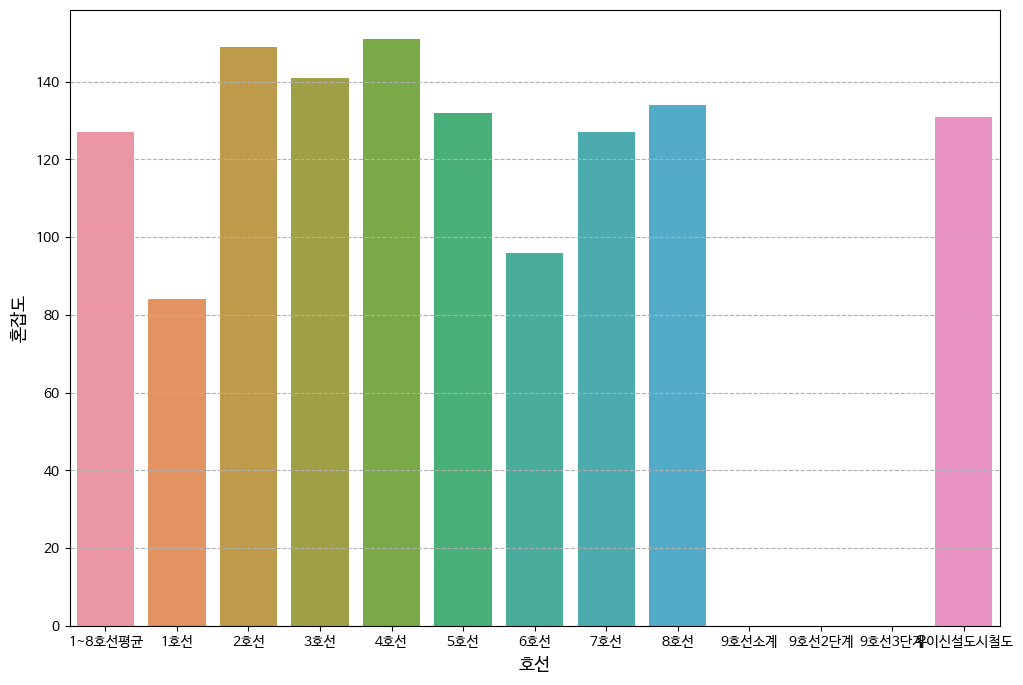

In [ ]:
plt.figure(figsize = (12,8))
sns.barplot(data = df2_3)
plt.grid(True, axis = 'y', linestyle = '--')
plt.xlabel('호선', fontsize = 13)
plt.ylabel('혼잡도', fontsize = 13)



> 결론




: 2021년 기준 2호선, 3호선, 4호선의 평균 혼잡도가 가장 높음









## 실시간 혼잡도 데이터 분석

> **현재 2,3호선은 신형 열차로 대부분 바뀐 상태라 실시간 혼잡도가 제공되고 있으므로, 4호선을 대상으로 분석 진행**



> 최근 3개월 지하철 이용 이력을 기반으로 호선, 방향, 요일, 시간대(10분), 구간별 혼잡도에 대한 데이터

- 혼잡도 34%: 좌석에 모두 앉은 상태
- 혼잡도 100%: 통로에 3줄, 각 출입문에 2명씩 서 있는 상태
- 혼잡도 230%: 통로에 5줄, 각 출입문에 30~40명씩 서 있는 상태
- 혼잡도 표시 기준: 적정 인원 대비 이용객 수가 130% 이하이면 ‘보통’, 130∼150%면 ‘주의’, 150∼170%면 ‘혼잡’, 170% 이상이면 ‘심각’ 단계로 관리





### 1) 4호선 역별 혼잡도

#### 1-1) 데이터 전처리

**평일 혼잡도**

In [ ]:
#평일 기본 데이터 전처리
scdata_weekday = pd.read_csv('/content/drive/MyDrive/Data Science_CAU/Team Project/서울교통공사_지하철혼잡도정보_20221231.csv', encoding = 'cp949')
scdata_weekday = scdata_weekday[(scdata_weekday['호선'] == 4) & (scdata_weekday['요일구분'] == '평일')]
scdata_weekday = scdata_weekday.drop(['연번', '요일구분', '호선', '역번호', '상하구분'], axis = 1)
scdata_weekday = scdata_weekday.rename(columns = {'출발역' : '역명'})
scdata_weekday.head()

,역명,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
190,당고개,0.1,5.2,0.9,1.8,3.2,4.1,2.1,2.2,1.2,...,3.8,4.4,2.2,3.4,4.0,2.6,3.9,4.4,2.6,1.4
191,당고개,4.4,5.2,9.0,12.7,18.3,21.2,13.0,13.8,9.8,...,1.9,1.9,2.3,1.9,1.9,1.6,1.3,1.7,0.7,0.0
192,상계,0.0,8.1,2.9,4.0,4.7,4.0,3.6,3.1,2.6,...,6.6,6.1,6.4,4.1,6.0,5.4,6.4,5.9,3.3,2.3
193,상계,9.7,10.6,18.0,23.3,34.4,38.6,23.9,24.8,12.9,...,3.4,3.5,4.6,3.3,5.0,3.2,2.2,3.2,1.2,0.0
194,노원,0.0,11.9,4.7,5.8,8.5,6.4,5.4,4.9,4.3,...,11.8,11.9,10.9,11.4,8.9,11.1,13.0,7.5,5.1,4.6


In [ ]:
#역 혼잡도 데이터 전처리
time_label_WD = [col for col in scdata_weekday.columns if col != '역명']
scdata_station_WD = scdata_weekday.copy()
scdata_station_WD['혼잡도'] = scdata_station_WD[time_label_WD].mean(axis = 1)
scdata_station_WD = scdata_station_WD.drop(time_label_WD, axis = 1)

In [ ]:
#역 혼잡도 데이터 분석
scdata_station_mean_WD = scdata_station_WD.groupby('역명')['혼잡도'].mean()
scdata_station_mean_WD = scdata_station_mean_WD.sort_values(ascending = False).to_frame()
scdata_station_mean_WD.nlargest(5,'혼잡도')

,혼잡도
역명,
동대문,50.064103
남태령,48.396154
혜화,48.297436
한성대입구,45.343590
동대문역사문화공원,44.229487


**주말 혼잡도**

In [ ]:
#주말 기본 데이터 전처리
scdata_weekend = pd.read_csv('/content/drive/MyDrive/Data Science_CAU/Team Project/서울교통공사_지하철혼잡도정보_20221231.csv', encoding = 'cp949')
scdata_weekend = scdata_weekend[(scdata_weekend['호선'] == 4) & (scdata_weekend['요일구분'] != '평일')]
scdata_weekend = scdata_weekend.drop(['연번', '요일구분', '호선', '역번호', '상하구분'], axis = 1)
scdata_weekend = scdata_weekend.rename(columns = {'출발역' : '역명'})
scdata_weekend.head()

,역명,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,...,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,00시00분,00시30분
742,진접,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
743,진접,1.2,2.2,2.1,3.0,4.1,3.6,4.5,5.5,3.5,...,0.8,1.8,1.7,0.6,1.0,0.9,1.0,0.4,NaN,NaN
744,오남,0.1,0.1,1.6,1.4,1.4,5.0,1.4,2.6,0.9,...,6.3,5.0,8.1,4.1,4.1,5.1,5.6,5.0,NaN,NaN
745,오남,3.2,4.9,4.9,6.8,9.6,8.5,9.5,13.5,7.7,...,2.5,3.6,3.3,2.3,1.2,1.6,1.8,0.6,NaN,NaN
746,별내별가람,0.1,0.3,3.3,2.7,2.3,7.1,3.0,3.6,1.6,...,12.9,11.7,12.1,11.0,11.3,12.3,11.3,11.4,NaN,NaN


In [ ]:
#역 혼잡도 데이터 전처리
time_label_WE = [col for col in scdata_weekend.columns if col != '역명']
scdata_station_WE = scdata_weekend.copy()
scdata_station_WE['혼잡도'] = scdata_station_WE[time_label_WE].mean(axis = 1)
scdata_station_WE = scdata_station_WE.drop(time_label_WE, axis = 1)

In [ ]:
#역 혼잡도 데이터 분석
scdata_station_mean_WE = scdata_station_WE.groupby('역명')['혼잡도'].mean()
scdata_station_mean_WE = scdata_station_mean_WE.sort_values(ascending = False).to_frame()
scdata_station_mean_WE.nlargest(5,'혼잡도')

,혼잡도
역명,
남태령,45.626351
동대문,42.656081
혜화,39.890541
동대문역사문화공원,38.997973
한성대입구,36.476351


#### 1-2) 4호선 역별/시간별 혼잡도 시각화

##### 평일

<Axes: >

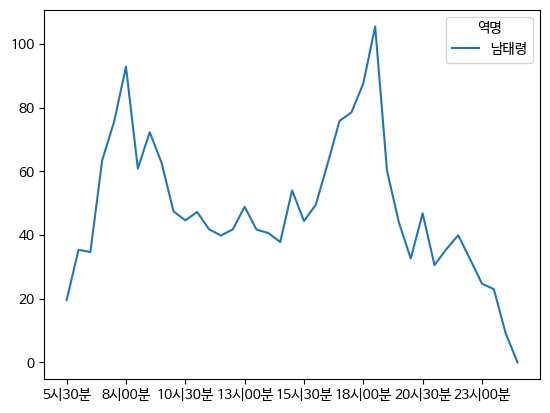

In [ ]:
#남태령 역 혼잡시간 데이터 전처리
scdata_namt = scdata_weekday[scdata_weekday.역명 == '남태령']

#남태령 역 혼잡시간 데이터 분석
scdata_namt_time = scdata_namt.groupby('역명').mean()
scdata_namt_time = scdata_namt_time.T
scdata_namt_time.plot()

<Axes: >

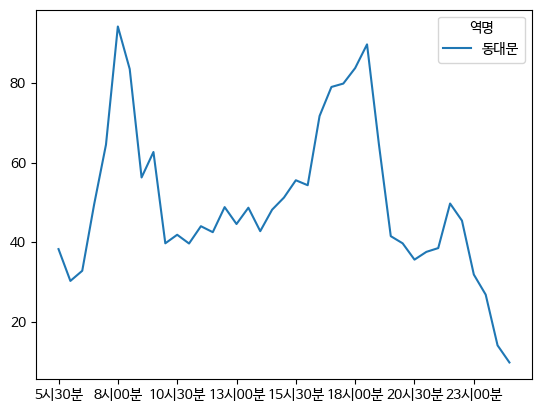

In [ ]:
#동대문 역 혼잡시간 데이터 전처리
scdata_namt = scdata_weekday[scdata_weekday.역명 == '동대문']

#동대문 역 혼잡시간 데이터 분석
scdata_namt_time = scdata_namt.groupby('역명').mean()
scdata_namt_time = scdata_namt_time.T
scdata_namt_time.plot()

<Axes: >

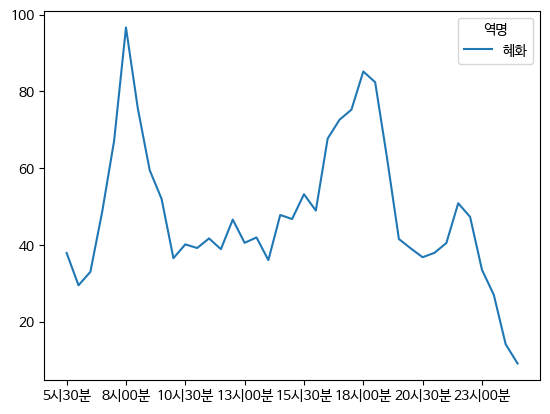

In [ ]:
#혜화 역 혼잡시간 데이터 전처리
scdata_namt = scdata_weekday[scdata_weekday.역명 == '혜화']

#혜화 역 혼잡시간 데이터 분석
scdata_namt_time = scdata_namt.groupby('역명').mean()
scdata_namt_time = scdata_namt_time.T
scdata_namt_time.plot()

##### 주말

<Axes: >

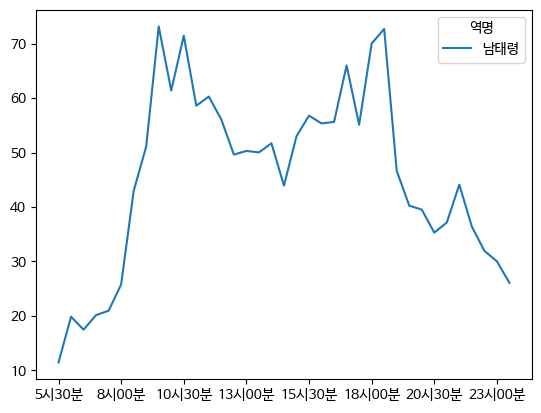

In [ ]:
#남태령 역 혼잡시간 데이터 전처리
scdata_namt = scdata_weekend[scdata_weekend.역명 == '남태령']

#남태령 역 혼잡시간 데이터 분석
scdata_namt_time = scdata_namt.groupby('역명').mean()
scdata_namt_time = scdata_namt_time.T
scdata_namt_time.plot()

<Axes: >

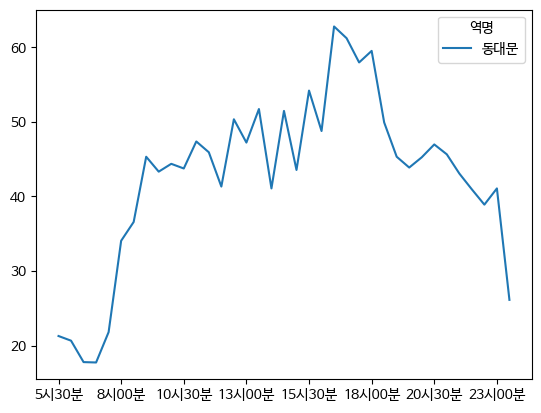

In [ ]:
#동대문 역 혼잡시간 데이터 전처리
scdata_namt = scdata_weekend[scdata_weekend.역명 == '동대문']

#동대문 역 혼잡시간 데이터 분석
scdata_namt_time = scdata_namt.groupby('역명').mean()
scdata_namt_time = scdata_namt_time.T
scdata_namt_time.plot()

<Axes: >

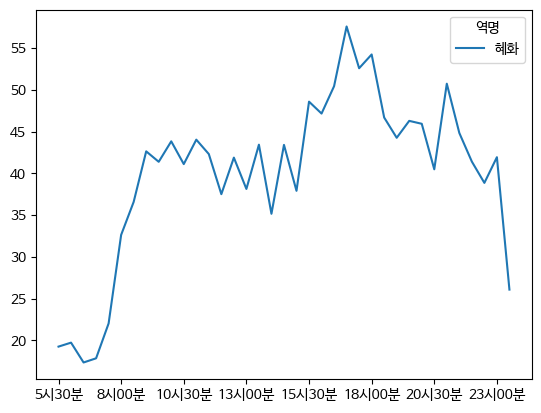

In [ ]:
#혜화 역 혼잡시간 데이터 전처리
scdata_namt = scdata_weekend[scdata_weekend.역명 == '혜화']

#혜화 역 혼잡시간 데이터 분석
scdata_namt_time = scdata_namt.groupby('역명').mean()
scdata_namt_time = scdata_namt_time.T
scdata_namt_time.plot()

### 2) 칸 별 혼잡도 비교


---

- 위의 4호선 역별 혼잡도 평균 분석 결과 상위 3개 역의 실시간 데이터를 대상으로 분석 진행

#### 남태령역 실시간 칸별 혼잡도 데이터

In [ ]:
NTdata10 = {
  "status": {
    "code": "00",
    "message": "success",
    "totalCount": 1
  },
  "contents": {
    "subwayLine": "4호선",
    "stationName": "남태령역",
    "stationCode": "434",
    "stat": [
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "444",
        "endStationName": "산본역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "453",
        "endStationName": "안산역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              63,
              63,
              103,
              80,
              46,
              63,
              63,
              23,
              51,
              17
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              33,
              66,
              58,
              96,
              75,
              81,
              60,
              32,
              39,
              29
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              60,
              85,
              68,
              69,
              72,
              60,
              56,
              40,
              31,
              19
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              69,
              81,
              65,
              70,
              62,
              53,
              45,
              47,
              37,
              31
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              31,
              53,
              47,
              26,
              34,
              29,
              24,
              12,
              13,
              10
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              81,
              81,
              133,
              104,
              59,
              81,
              81,
              30,
              67,
              22
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              49,
              98,
              85,
              141,
              110,
              119,
              89,
              47,
              58,
              43
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              44,
              62,
              50,
              51,
              53,
              44,
              41,
              29,
              23,
              14
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              76,
              90,
              72,
              78,
              68,
              58,
              50,
              52,
              41,
              34
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              72,
              121,
              108,
              60,
              78,
              66,
              54,
              28,
              30,
              22
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              81,
              88,
              123,
              82,
              78,
              62,
              65,
              40,
              31,
              31
            ]
          }
        ]
      },
      {
        "startStationCode": "419",
        "startStationName": "한성대입구역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "444",
        "startStationName": "산본역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "453",
        "startStationName": "안산역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              56,
              88,
              89,
              90,
              100,
              114,
              80,
              83,
              126,
              84
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              71,
              83,
              69,
              83,
              88,
              102,
              57,
              68,
              85,
              64
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              52,
              47,
              57,
              60,
              66,
              65,
              59,
              50,
              74,
              69
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              52,
              49,
              35,
              38,
              52,
              52,
              61,
              35,
              73,
              23
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              77,
              74,
              85,
              85,
              97,
              140,
              88,
              94,
              83,
              117
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              61,
              90,
              83,
              102,
              121,
              85,
              100,
              75,
              84,
              80
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "411",
        "endStationName": "노원역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "419",
        "endStationName": "한성대입구역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      }
    ],
    "statStartDate": "20230311",
    "statEndDate": "20230610"
  }
}

In [ ]:
NTdata18 = {
  "status": {
    "code": "00",
    "message": "success",
    "totalCount": 1
  },
  "contents": {
    "subwayLine": "4호선",
    "stationName": "남태령역",
    "stationCode": "434",
    "stat": [
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "444",
        "endStationName": "산본역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "453",
        "endStationName": "안산역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              44,
              64,
              55,
              56,
              75,
              53,
              56,
              55,
              41,
              32
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              77,
              72,
              55,
              66,
              59,
              57,
              51,
              46,
              48,
              29
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              37,
              52,
              65,
              43,
              66,
              67,
              34,
              39,
              33,
              34
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              62,
              77,
              62,
              67,
              53,
              76,
              72,
              41,
              50,
              31
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              65,
              86,
              78,
              80,
              47,
              86,
              57,
              39,
              49,
              33
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              57,
              50,
              57,
              60,
              71,
              64,
              82,
              64,
              60,
              36
            ]
          }
        ]
      },
      {
        "startStationCode": "419",
        "startStationName": "한성대입구역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "444",
        "startStationName": "산본역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "453",
        "startStationName": "안산역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              33,
              47,
              37,
              33,
              31,
              30,
              23,
              24,
              34,
              39
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              23,
              41,
              39,
              42,
              29,
              33,
              39,
              40,
              39,
              43
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              76,
              84,
              76,
              83,
              75,
              63,
              57,
              65,
              80,
              81
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              78,
              94,
              101,
              68,
              82,
              53,
              69,
              73,
              65,
              59
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              49,
              55,
              43,
              48,
              50,
              44,
              44,
              39,
              50,
              48
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              38,
              40,
              42,
              42,
              40,
              71,
              50,
              29,
              77,
              42
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              99,
              140,
              111,
              97,
              92,
              88,
              68,
              70,
              101,
              115
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              39,
              70,
              67,
              72,
              50,
              56,
              67,
              68,
              67,
              74
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              95,
              105,
              94,
              104,
              93,
              79,
              71,
              80,
              100,
              100
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              93,
              113,
              121,
              81,
              98,
              64,
              83,
              87,
              78,
              70
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              62,
              71,
              55,
              61,
              64,
              56,
              56,
              50,
              64,
              61
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              34,
              36,
              38,
              38,
              36,
              65,
              46,
              27,
              71,
              38
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "411",
        "endStationName": "노원역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "419",
        "endStationName": "한성대입구역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      }
    ],
    "statStartDate": "20230311",
    "statEndDate": "20230610"
  }
}

In [ ]:
SUN_NTdata10 = {
  "status": {
    "code": "00",
    "message": "success",
    "totalCount": 1
  },
  "contents": {
    "subwayLine": "4호선",
    "stationName": "남태령역",
    "stationCode": "434",
    "stat": [
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "444",
        "endStationName": "산본역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "453",
        "endStationName": "안산역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              47,
              47,
              77,
              60,
              34,
              47,
              47,
              17,
              39,
              13
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              25,
              50,
              44,
              72,
              57,
              61,
              45,
              24,
              30,
              22
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              63,
              85,
              71,
              72,
              74,
              63,
              59,
              41,
              31,
              21
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              71,
              84,
              67,
              73,
              64,
              54,
              47,
              49,
              38,
              32
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              33,
              55,
              49,
              27,
              35,
              30,
              24,
              13,
              14,
              10
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              64,
              64,
              104,
              81,
              46,
              64,
              64,
              23,
              52,
              17
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              47,
              94,
              82,
              136,
              106,
              115,
              86,
              45,
              56,
              42
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              38,
              52,
              43,
              43,
              45,
              38,
              35,
              25,
              19,
              13
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              58,
              68,
              54,
              59,
              52,
              44,
              38,
              40,
              31,
              26
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              62,
              104,
              93,
              52,
              67,
              57,
              46,
              24,
              26,
              19
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              59,
              65,
              90,
              60,
              57,
              46,
              47,
              29,
              23,
              23
            ]
          }
        ]
      },
      {
        "startStationCode": "419",
        "startStationName": "한성대입구역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "444",
        "startStationName": "산본역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "453",
        "startStationName": "안산역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              35,
              55,
              56,
              56,
              63,
              72,
              50,
              52,
              79,
              52
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              53,
              53,
              45,
              54,
              57,
              68,
              37,
              45,
              60,
              47
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              33,
              32,
              37,
              38,
              40,
              40,
              39,
              31,
              45,
              44
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              56,
              52,
              37,
              40,
              56,
              56,
              65,
              37,
              77,
              25
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              33,
              39,
              33,
              59,
              50,
              95,
              42,
              59,
              53,
              47
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              39,
              58,
              53,
              66,
              78,
              55,
              65,
              49,
              55,
              52
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "411",
        "endStationName": "노원역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "419",
        "endStationName": "한성대입구역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "10",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      }
    ],
    "statStartDate": "20230312",
    "statEndDate": "20230611"
  }
}

In [ ]:
SUN_NTdata18 = {
  "status": {
    "code": "00",
    "message": "success",
    "totalCount": 1
  },
  "contents": {
    "subwayLine": "4호선",
    "stationName": "남태령역",
    "stationCode": "434",
    "stat": [
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "444",
        "endStationName": "산본역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "453",
        "endStationName": "안산역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              35,
              52,
              41,
              43,
              59,
              42,
              44,
              45,
              33,
              26
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              60,
              54,
              44,
              52,
              48,
              46,
              40,
              38,
              42,
              24
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              18,
              29,
              39,
              24,
              31,
              38,
              21,
              21,
              16,
              20
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              42,
              54,
              43,
              47,
              41,
              54,
              55,
              29,
              34,
              22
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              52,
              60,
              57,
              61,
              34,
              62,
              45,
              28,
              35,
              25
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              42,
              36,
              42,
              44,
              52,
              47,
              60,
              47,
              44,
              26
            ]
          }
        ]
      },
      {
        "startStationCode": "419",
        "startStationName": "한성대입구역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "433",
        "prevStationName": "사당역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "444",
        "startStationName": "산본역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "453",
        "startStationName": "안산역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              27,
              38,
              31,
              27,
              25,
              24,
              19,
              19,
              28,
              32
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              35,
              59,
              57,
              62,
              43,
              51,
              62,
              62,
              56,
              63
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              58,
              65,
              58,
              58,
              56,
              47,
              43,
              50,
              57,
              58
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              67,
              82,
              87,
              58,
              70,
              46,
              59,
              63,
              56,
              51
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              73,
              75,
              74,
              74,
              79,
              73,
              65,
              62,
              79,
              75
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              39,
              41,
              44,
              44,
              41,
              74,
              52,
              30,
              81,
              44
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              63,
              90,
              71,
              62,
              59,
              57,
              44,
              45,
              65,
              74
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              30,
              51,
              49,
              53,
              37,
              44,
              53,
              53,
              48,
              54
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              83,
              92,
              83,
              83,
              79,
              67,
              61,
              70,
              81,
              82
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              75,
              90,
              97,
              65,
              78,
              51,
              66,
              70,
              62,
              56
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              57,
              59,
              58,
              58,
              61,
              57,
              51,
              48,
              62,
              59
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              34,
              35,
              37,
              37,
              35,
              63,
              45,
              26,
              69,
              37
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "411",
        "endStationName": "노원역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "419",
        "endStationName": "한성대입구역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "435",
        "prevStationName": "선바위역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "18",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      }
    ],
    "statStartDate": "20230312",
    "statEndDate": "20230611"
  }
}

#### 혜화역 실시간 칸별 혼잡도 데이터

In [ ]:
Hdata17 = {
  "status": {
    "code": "00",
    "message": "success",
    "totalCount": 1
  },
  "contents": {
    "subwayLine": "4호선",
    "stationName": "혜화역",
    "stationCode": "420",
    "stat": [
      {
        "startStationCode": "405",
        "startStationName": "진접역",
        "endStationCode": "426",
        "endStationName": "서울역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              22,
              33,
              30,
              46,
              31,
              45,
              44,
              44,
              37,
              38
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              19,
              37,
              31,
              40,
              35,
              42,
              49,
              36,
              32,
              40
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              35,
              37,
              34,
              37,
              43,
              46,
              57,
              38,
              40,
              43
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              25,
              35,
              30,
              33,
              31,
              39,
              51,
              41,
              41,
              35
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              26,
              36,
              25,
              35,
              48,
              34,
              51,
              40,
              35,
              40
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              12,
              27,
              24,
              27,
              33,
              35,
              36,
              29,
              25,
              42
            ]
          }
        ]
      },
      {
        "startStationCode": "405",
        "startStationName": "진접역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              22,
              33,
              30,
              46,
              31,
              45,
              44,
              44,
              37,
              38
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              19,
              37,
              31,
              40,
              35,
              42,
              49,
              36,
              32,
              40
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              35,
              37,
              34,
              37,
              43,
              46,
              57,
              38,
              40,
              43
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              25,
              35,
              30,
              33,
              31,
              39,
              51,
              41,
              41,
              35
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              26,
              36,
              25,
              35,
              48,
              34,
              51,
              40,
              35,
              40
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              12,
              27,
              24,
              27,
              33,
              35,
              36,
              29,
              25,
              42
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              24,
              37,
              33,
              50,
              35,
              50,
              49,
              49,
              40,
              42
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              15,
              28,
              24,
              31,
              27,
              32,
              38,
              28,
              25,
              31
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              28,
              30,
              27,
              30,
              34,
              37,
              46,
              31,
              32,
              35
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              26,
              37,
              31,
              35,
              33,
              41,
              54,
              43,
              43,
              37
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              21,
              29,
              20,
              28,
              39,
              28,
              41,
              33,
              28,
              33
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              12,
              29,
              25,
              29,
              35,
              37,
              39,
              31,
              27,
              45
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "444",
        "endStationName": "산본역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "453",
        "endStationName": "안산역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              22,
              33,
              30,
              46,
              31,
              45,
              44,
              44,
              37,
              38
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              23,
              46,
              39,
              50,
              44,
              52,
              61,
              45,
              40,
              50
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              43,
              45,
              41,
              45,
              52,
              56,
              70,
              47,
              49,
              53
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              26,
              36,
              31,
              34,
              32,
              40,
              52,
              42,
              42,
              36
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              30,
              41,
              28,
              40,
              55,
              39,
              57,
              46,
              40,
              46
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              12,
              28,
              25,
              28,
              34,
              36,
              37,
              30,
              26,
              44
            ]
          }
        ]
      },
      {
        "startStationCode": "411",
        "startStationName": "노원역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "412",
        "startStationName": "창동역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "419",
        "startStationName": "한성대입구역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "426",
        "startStationName": "서울역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "405",
        "endStationName": "진접역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              48,
              81,
              78,
              89,
              69,
              68,
              68,
              65,
              74,
              48
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              58,
              66,
              72,
              72,
              76,
              57,
              68,
              55,
              61,
              56
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              51,
              71,
              72,
              84,
              75,
              73,
              66,
              65,
              55,
              57
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              32,
              65,
              74,
              74,
              66,
              61,
              50,
              41,
              58,
              49
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              44,
              75,
              66,
              79,
              77,
              70,
              60,
              47,
              52,
              50
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              44,
              76,
              82,
              80,
              70,
              68,
              66,
              62,
              73,
              48
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              47,
              80,
              77,
              88,
              68,
              67,
              67,
              64,
              73,
              47
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              43,
              49,
              53,
              53,
              56,
              42,
              50,
              40,
              44,
              41
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              46,
              64,
              66,
              77,
              69,
              67,
              60,
              59,
              50,
              52
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              30,
              62,
              70,
              70,
              63,
              58,
              48,
              39,
              55,
              47
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              44,
              75,
              66,
              79,
              77,
              70,
              60,
              47,
              52,
              50
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              44,
              75,
              81,
              79,
              69,
              67,
              65,
              61,
              72,
              47
            ]
          }
        ]
      },
      {
        "startStationCode": "434",
        "startStationName": "남태령역",
        "endStationCode": "405",
        "endStationName": "진접역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              48,
              81,
              78,
              89,
              69,
              68,
              68,
              65,
              74,
              48
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              58,
              66,
              72,
              72,
              76,
              57,
              68,
              55,
              61,
              56
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              51,
              71,
              72,
              84,
              75,
              73,
              66,
              65,
              55,
              57
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              32,
              65,
              74,
              74,
              66,
              61,
              50,
              41,
              58,
              49
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              44,
              75,
              66,
              79,
              77,
              70,
              60,
              47,
              52,
              50
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              44,
              76,
              82,
              80,
              70,
              68,
              66,
              62,
              73,
              48
            ]
          }
        ]
      },
      {
        "startStationCode": "444",
        "startStationName": "산본역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "453",
        "startStationName": "안산역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              49,
              82,
              80,
              90,
              70,
              69,
              69,
              66,
              75,
              49
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              64,
              73,
              78,
              79,
              83,
              62,
              74,
              60,
              66,
              61
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              51,
              71,
              72,
              84,
              75,
              73,
              66,
              65,
              55,
              57
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              36,
              73,
              83,
              83,
              74,
              68,
              56,
              46,
              65,
              55
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              44,
              75,
              66,
              79,
              77,
              70,
              60,
              47,
              52,
              50
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              35,
              60,
              65,
              63,
              56,
              54,
              52,
              49,
              58,
              38
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              49,
              83,
              81,
              92,
              71,
              70,
              70,
              67,
              77,
              49
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              60,
              68,
              74,
              75,
              78,
              59,
              70,
              56,
              62,
              58
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              61,
              85,
              87,
              102,
              91,
              89,
              80,
              79,
              66,
              69
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              27,
              56,
              63,
              63,
              57,
              52,
              43,
              35,
              50,
              42
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              44,
              75,
              66,
              79,
              77,
              70,
              60,
              47,
              52,
              50
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              49,
              84,
              91,
              88,
              78,
              75,
              73,
              69,
              80,
              53
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "411",
        "endStationName": "노원역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "419",
        "endStationName": "한성대입구역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      }
    ],
    "statStartDate": "20230315",
    "statEndDate": "20230614"
  }
}

In [ ]:
SUN_Hdata17 = {
  "status": {
    "code": "00",
    "message": "success",
    "totalCount": 1
  },
  "contents": {
    "subwayLine": "4호선",
    "stationName": "혜화역",
    "stationCode": "420",
    "stat": [
      {
        "startStationCode": "405",
        "startStationName": "진접역",
        "endStationCode": "426",
        "endStationName": "서울역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              15,
              23,
              20,
              31,
              21,
              30,
              30,
              30,
              25,
              26
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              14,
              27,
              24,
              30,
              26,
              31,
              37,
              27,
              24,
              30
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              25,
              26,
              24,
              26,
              30,
              32,
              41,
              27,
              28,
              31
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              18,
              25,
              22,
              24,
              23,
              28,
              37,
              30,
              30,
              25
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              15,
              20,
              14,
              20,
              27,
              19,
              29,
              23,
              20,
              23
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              8,
              20,
              17,
              20,
              24,
              25,
              26,
              21,
              18,
              31
            ]
          }
        ]
      },
      {
        "startStationCode": "405",
        "startStationName": "진접역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              15,
              23,
              20,
              31,
              21,
              30,
              30,
              30,
              25,
              26
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              14,
              27,
              24,
              30,
              26,
              31,
              37,
              27,
              24,
              30
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              25,
              26,
              24,
              26,
              30,
              32,
              41,
              27,
              28,
              31
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              18,
              25,
              22,
              24,
              23,
              28,
              37,
              30,
              30,
              25
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              15,
              20,
              14,
              20,
              27,
              19,
              29,
              23,
              20,
              23
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              8,
              20,
              17,
              20,
              24,
              25,
              26,
              21,
              18,
              31
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              15,
              23,
              21,
              32,
              22,
              32,
              31,
              31,
              26,
              27
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              12,
              23,
              20,
              26,
              22,
              27,
              31,
              23,
              20,
              25
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              26,
              27,
              25,
              27,
              31,
              34,
              42,
              28,
              29,
              32
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              17,
              23,
              20,
              22,
              21,
              26,
              34,
              27,
              27,
              23
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              13,
              18,
              13,
              18,
              25,
              18,
              26,
              21,
              18,
              21
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              8,
              19,
              16,
              19,
              23,
              24,
              25,
              20,
              17,
              29
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "444",
        "endStationName": "산본역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "453",
        "endStationName": "안산역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              15,
              23,
              20,
              31,
              21,
              30,
              30,
              30,
              25,
              26
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              17,
              34,
              29,
              37,
              32,
              38,
              45,
              33,
              29,
              37
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              27,
              28,
              25,
              28,
              32,
              35,
              43,
              29,
              30,
              33
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              22,
              31,
              26,
              29,
              28,
              34,
              45,
              37,
              37,
              31
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              16,
              22,
              15,
              22,
              30,
              21,
              31,
              25,
              22,
              25
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              10,
              23,
              20,
              23,
              27,
              29,
              30,
              24,
              21,
              35
            ]
          }
        ]
      },
      {
        "startStationCode": "411",
        "startStationName": "노원역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "412",
        "startStationName": "창동역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "419",
        "startStationName": "한성대입구역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "419",
        "prevStationName": "한성대입구역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "426",
        "startStationName": "서울역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "405",
        "endStationName": "진접역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              28,
              47,
              46,
              52,
              40,
              40,
              40,
              38,
              43,
              28
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              39,
              45,
              48,
              49,
              51,
              38,
              45,
              37,
              41,
              38
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              32,
              44,
              45,
              53,
              47,
              46,
              42,
              41,
              34,
              36
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              21,
              43,
              49,
              49,
              44,
              40,
              34,
              27,
              39,
              33
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              30,
              51,
              44,
              54,
              52,
              47,
              41,
              32,
              35,
              34
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              27,
              47,
              50,
              49,
              43,
              42,
              40,
              38,
              45,
              29
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              27,
              46,
              44,
              50,
              39,
              39,
              39,
              37,
              42,
              27
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              27,
              31,
              34,
              34,
              36,
              27,
              32,
              26,
              28,
              26
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              20,
              28,
              29,
              34,
              30,
              30,
              27,
              26,
              22,
              23
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              22,
              44,
              50,
              50,
              45,
              42,
              34,
              28,
              40,
              34
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              26,
              45,
              39,
              47,
              46,
              42,
              36,
              28,
              31,
              30
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              28,
              49,
              53,
              51,
              45,
              44,
              42,
              40,
              47,
              31
            ]
          }
        ]
      },
      {
        "startStationCode": "434",
        "startStationName": "남태령역",
        "endStationCode": "405",
        "endStationName": "진접역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              28,
              47,
              46,
              52,
              40,
              40,
              40,
              38,
              43,
              28
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              39,
              45,
              48,
              49,
              51,
              38,
              45,
              37,
              41,
              38
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              32,
              44,
              45,
              53,
              47,
              46,
              42,
              41,
              34,
              36
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              21,
              43,
              49,
              49,
              44,
              40,
              34,
              27,
              39,
              33
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              30,
              51,
              44,
              54,
              52,
              47,
              41,
              32,
              35,
              34
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              27,
              47,
              50,
              49,
              43,
              42,
              40,
              38,
              45,
              29
            ]
          }
        ]
      },
      {
        "startStationCode": "444",
        "startStationName": "산본역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "453",
        "startStationName": "안산역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              27,
              46,
              44,
              50,
              39,
              39,
              39,
              37,
              42,
              27
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              48,
              55,
              59,
              60,
              63,
              47,
              56,
              45,
              50,
              46
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              34,
              47,
              49,
              56,
              51,
              49,
              45,
              44,
              37,
              38
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              21,
              42,
              48,
              48,
              43,
              39,
              33,
              27,
              38,
              32
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              22,
              37,
              33,
              40,
              38,
              35,
              30,
              24,
              26,
              25
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              16,
              28,
              31,
              30,
              26,
              25,
              25,
              23,
              27,
              18
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              30,
              50,
              49,
              56,
              43,
              43,
              43,
              40,
              46,
              30
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              43,
              49,
              53,
              53,
              56,
              42,
              50,
              40,
              44,
              41
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              45,
              62,
              64,
              74,
              66,
              65,
              58,
              57,
              48,
              50
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              39,
              80,
              90,
              90,
              81,
              75,
              62,
              50,
              72,
              60
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              36,
              62,
              54,
              65,
              63,
              58,
              49,
              39,
              43,
              41
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              33,
              57,
              61,
              60,
              52,
              51,
              49,
              47,
              54,
              36
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "411",
        "endStationName": "노원역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "419",
        "endStationName": "한성대입구역",
        "prevStationCode": "421",
        "prevStationName": "동대문역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      }
    ],
    "statStartDate": "20230315",
    "statEndDate": "20230614"
  }
}

#### 동대문역 실시간 칸별 혼잡도 데이터

In [ ]:
Ddata17 = {
  "status": {
    "code": "00",
    "message": "success",
    "totalCount": 1
  },
  "contents": {
    "subwayLine": "4호선",
    "stationName": "동대문역",
    "stationCode": "421",
    "stat": [
      {
        "startStationCode": "405",
        "startStationName": "진접역",
        "endStationCode": "426",
        "endStationName": "서울역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              36,
              56,
              42,
              61,
              47,
              57,
              57,
              58,
              45,
              51
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              24,
              54,
              49,
              52,
              48,
              56,
              62,
              49,
              44,
              52
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              39,
              66,
              46,
              46,
              47,
              54,
              67,
              55,
              47,
              63
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              34,
              55,
              40,
              47,
              40,
              49,
              73,
              48,
              57,
              48
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              33,
              46,
              39,
              38,
              43,
              39,
              59,
              53,
              38,
              43
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              25,
              49,
              37,
              44,
              48,
              39,
              52,
              43,
              34,
              50
            ]
          }
        ]
      },
      {
        "startStationCode": "405",
        "startStationName": "진접역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              36,
              56,
              42,
              61,
              47,
              57,
              57,
              58,
              45,
              51
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              24,
              54,
              49,
              52,
              48,
              56,
              62,
              49,
              44,
              52
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              39,
              66,
              46,
              46,
              47,
              54,
              67,
              55,
              47,
              63
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              34,
              55,
              40,
              47,
              40,
              49,
              73,
              48,
              57,
              48
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              33,
              46,
              39,
              38,
              43,
              39,
              59,
              53,
              38,
              43
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              25,
              49,
              37,
              44,
              48,
              39,
              52,
              43,
              34,
              50
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              36,
              56,
              42,
              61,
              47,
              57,
              57,
              58,
              45,
              51
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              21,
              48,
              43,
              46,
              42,
              49,
              54,
              43,
              39,
              45
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              35,
              59,
              42,
              42,
              43,
              49,
              60,
              50,
              43,
              57
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              34,
              55,
              40,
              47,
              40,
              49,
              73,
              48,
              57,
              48
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              31,
              43,
              36,
              35,
              40,
              37,
              55,
              49,
              35,
              40
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              22,
              43,
              33,
              39,
              42,
              34,
              46,
              38,
              30,
              44
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "444",
        "endStationName": "산본역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "453",
        "endStationName": "안산역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              39,
              61,
              45,
              65,
              51,
              61,
              61,
              63,
              48,
              55
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              29,
              65,
              59,
              63,
              58,
              68,
              74,
              59,
              53,
              62
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              45,
              75,
              53,
              53,
              54,
              62,
              77,
              63,
              54,
              73
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              37,
              59,
              43,
              50,
              43,
              53,
              79,
              52,
              62,
              52
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              41,
              56,
              48,
              47,
              53,
              49,
              72,
              65,
              47,
              53
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              28,
              56,
              43,
              50,
              54,
              44,
              60,
              49,
              38,
              57
            ]
          }
        ]
      },
      {
        "startStationCode": "411",
        "startStationName": "노원역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "412",
        "startStationName": "창동역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "419",
        "startStationName": "한성대입구역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "426",
        "startStationName": "서울역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "405",
        "endStationName": "진접역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              57,
              80,
              78,
              80,
              72,
              68,
              57,
              60,
              69,
              50
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              48,
              60,
              70,
              65,
              65,
              50,
              67,
              56,
              52,
              59
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              50,
              82,
              63,
              92,
              81,
              76,
              67,
              52,
              66,
              53
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              34,
              62,
              71,
              78,
              68,
              71,
              48,
              42,
              43,
              52
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              48,
              74,
              66,
              67,
              73,
              66,
              58,
              55,
              50,
              53
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              45,
              71,
              76,
              70,
              64,
              57,
              62,
              53,
              67,
              45
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              50,
              71,
              69,
              71,
              63,
              60,
              50,
              52,
              60,
              44
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              41,
              52,
              60,
              56,
              56,
              43,
              58,
              48,
              45,
              51
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              47,
              77,
              60,
              86,
              76,
              71,
              63,
              49,
              62,
              49
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              27,
              50,
              58,
              63,
              55,
              57,
              39,
              34,
              35,
              42
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              46,
              70,
              62,
              63,
              70,
              63,
              55,
              53,
              47,
              51
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              46,
              73,
              79,
              72,
              66,
              59,
              64,
              55,
              69,
              46
            ]
          }
        ]
      },
      {
        "startStationCode": "434",
        "startStationName": "남태령역",
        "endStationCode": "405",
        "endStationName": "진접역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              57,
              80,
              78,
              80,
              72,
              68,
              57,
              60,
              69,
              50
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              48,
              60,
              70,
              65,
              65,
              50,
              67,
              56,
              52,
              59
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              50,
              82,
              63,
              92,
              81,
              76,
              67,
              52,
              66,
              53
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              34,
              62,
              71,
              78,
              68,
              71,
              48,
              42,
              43,
              52
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              48,
              74,
              66,
              67,
              73,
              66,
              58,
              55,
              50,
              53
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              45,
              71,
              76,
              70,
              64,
              57,
              62,
              53,
              67,
              45
            ]
          }
        ]
      },
      {
        "startStationCode": "444",
        "startStationName": "산본역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "453",
        "startStationName": "안산역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              58,
              83,
              80,
              83,
              74,
              70,
              59,
              61,
              71,
              51
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              52,
              66,
              77,
              71,
              71,
              55,
              74,
              61,
              58,
              64
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              46,
              76,
              59,
              85,
              75,
              70,
              62,
              48,
              61,
              49
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              36,
              68,
              78,
              85,
              74,
              77,
              53,
              45,
              47,
              57
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              50,
              76,
              68,
              69,
              76,
              68,
              59,
              57,
              52,
              55
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              43,
              69,
              74,
              68,
              62,
              55,
              60,
              52,
              65,
              43
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              71,
              101,
              98,
              101,
              90,
              86,
              72,
              75,
              86,
              62
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              51,
              64,
              74,
              69,
              69,
              53,
              72,
              60,
              56,
              62
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              57,
              94,
              73,
              105,
              93,
              87,
              77,
              59,
              76,
              60
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              38,
              70,
              80,
              88,
              77,
              79,
              54,
              47,
              49,
              59
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              49,
              75,
              67,
              68,
              74,
              67,
              58,
              56,
              51,
              54
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              47,
              74,
              80,
              73,
              67,
              60,
              65,
              56,
              70,
              47
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "411",
        "endStationName": "노원역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "419",
        "endStationName": "한성대입구역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SAT",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      }
    ],
    "statStartDate": "20230315",
    "statEndDate": "20230614"
  }
}

In [ ]:
SUN_Ddata17 = {
  "status": {
    "code": "00",
    "message": "success",
    "totalCount": 1
  },
  "contents": {
    "subwayLine": "4호선",
    "stationName": "동대문역",
    "stationCode": "421",
    "stat": [
      {
        "startStationCode": "405",
        "startStationName": "진접역",
        "endStationCode": "426",
        "endStationName": "서울역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              24,
              37,
              28,
              40,
              32,
              38,
              38,
              39,
              30,
              34
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              16,
              36,
              33,
              35,
              32,
              38,
              42,
              33,
              30,
              35
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              26,
              45,
              31,
              31,
              32,
              37,
              45,
              37,
              32,
              43
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              24,
              38,
              27,
              32,
              27,
              34,
              50,
              33,
              40,
              34
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              21,
              30,
              25,
              25,
              28,
              26,
              38,
              34,
              25,
              28
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              16,
              31,
              24,
              28,
              31,
              25,
              33,
              27,
              22,
              32
            ]
          }
        ]
      },
      {
        "startStationCode": "405",
        "startStationName": "진접역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              24,
              37,
              28,
              40,
              32,
              38,
              38,
              39,
              30,
              34
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              16,
              36,
              33,
              35,
              32,
              38,
              42,
              33,
              30,
              35
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              26,
              45,
              31,
              31,
              32,
              37,
              45,
              37,
              32,
              43
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              24,
              38,
              27,
              32,
              27,
              34,
              50,
              33,
              40,
              34
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              21,
              30,
              25,
              25,
              28,
              26,
              38,
              34,
              25,
              28
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              16,
              31,
              24,
              28,
              31,
              25,
              33,
              27,
              22,
              32
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              25,
              40,
              29,
              43,
              33,
              40,
              40,
              41,
              32,
              36
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              13,
              29,
              26,
              28,
              26,
              30,
              33,
              26,
              23,
              27
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              26,
              43,
              31,
              31,
              31,
              35,
              44,
              36,
              31,
              42
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              22,
              36,
              26,
              30,
              26,
              32,
              47,
              31,
              37,
              32
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              18,
              26,
              22,
              21,
              24,
              22,
              33,
              30,
              21,
              24
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              14,
              28,
              21,
              25,
              27,
              22,
              30,
              24,
              19,
              29
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "444",
        "endStationName": "산본역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "453",
        "endStationName": "안산역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "409",
        "startStationName": "당고개역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              23,
              36,
              27,
              39,
              31,
              37,
              37,
              38,
              29,
              33
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              18,
              42,
              38,
              40,
              37,
              44,
              48,
              38,
              34,
              40
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              27,
              46,
              32,
              32,
              33,
              38,
              47,
              38,
              33,
              44
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              27,
              44,
              32,
              37,
              32,
              39,
              58,
              38,
              46,
              39
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              26,
              36,
              31,
              30,
              34,
              31,
              46,
              42,
              30,
              34
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              18,
              36,
              28,
              32,
              35,
              29,
              38,
              31,
              25,
              37
            ]
          }
        ]
      },
      {
        "startStationCode": "411",
        "startStationName": "노원역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "412",
        "startStationName": "창동역",
        "endStationCode": "433",
        "endStationName": "사당역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "419",
        "startStationName": "한성대입구역",
        "endStationCode": "456",
        "endStationName": "오이도역",
        "prevStationCode": "420",
        "prevStationName": "혜화역",
        "updnLine": 1,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "426",
        "startStationName": "서울역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "405",
        "endStationName": "진접역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              38,
              54,
              52,
              54,
              48,
              46,
              38,
              40,
              46,
              33
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              30,
              38,
              44,
              41,
              41,
              31,
              42,
              35,
              33,
              37
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              29,
              48,
              37,
              54,
              47,
              44,
              39,
              30,
              39,
              31
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              23,
              42,
              49,
              54,
              47,
              48,
              33,
              28,
              30,
              36
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              34,
              52,
              46,
              47,
              52,
              47,
              41,
              39,
              35,
              37
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              29,
              46,
              50,
              46,
              42,
              38,
              41,
              35,
              44,
              29
            ]
          }
        ]
      },
      {
        "startStationCode": "433",
        "startStationName": "사당역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              31,
              44,
              43,
              44,
              40,
              38,
              32,
              33,
              38,
              27
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              21,
              26,
              31,
              29,
              29,
              22,
              30,
              25,
              23,
              26
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              20,
              32,
              25,
              36,
              32,
              30,
              27,
              20,
              26,
              21
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              21,
              39,
              45,
              49,
              43,
              45,
              31,
              26,
              27,
              33
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              30,
              46,
              41,
              42,
              46,
              41,
              36,
              34,
              31,
              33
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              31,
              49,
              52,
              48,
              44,
              39,
              43,
              37,
              46,
              31
            ]
          }
        ]
      },
      {
        "startStationCode": "434",
        "startStationName": "남태령역",
        "endStationCode": "405",
        "endStationName": "진접역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              38,
              54,
              52,
              54,
              48,
              46,
              38,
              40,
              46,
              33
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              30,
              38,
              44,
              41,
              41,
              31,
              42,
              35,
              33,
              37
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              29,
              48,
              37,
              54,
              47,
              44,
              39,
              30,
              39,
              31
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              23,
              42,
              49,
              54,
              47,
              48,
              33,
              28,
              30,
              36
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              34,
              52,
              46,
              47,
              52,
              47,
              41,
              39,
              35,
              37
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              29,
              46,
              50,
              46,
              42,
              38,
              41,
              35,
              44,
              29
            ]
          }
        ]
      },
      {
        "startStationCode": "444",
        "startStationName": "산본역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "453",
        "startStationName": "안산역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              46,
              65,
              63,
              65,
              58,
              55,
              46,
              48,
              55,
              40
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              30,
              38,
              44,
              41,
              41,
              31,
              42,
              35,
              33,
              37
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              31,
              50,
              39,
              57,
              50,
              47,
              41,
              32,
              41,
              32
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              25,
              47,
              54,
              59,
              52,
              53,
              37,
              31,
              33,
              39
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              35,
              53,
              47,
              48,
              53,
              48,
              41,
              40,
              36,
              38
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              30,
              48,
              51,
              47,
              43,
              38,
              42,
              36,
              45,
              30
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "409",
        "endStationName": "당고개역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              43,
              61,
              59,
              61,
              54,
              52,
              44,
              45,
              52,
              38
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              39,
              50,
              58,
              54,
              54,
              41,
              56,
              46,
              43,
              49
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              41,
              67,
              52,
              76,
              66,
              62,
              55,
              42,
              55,
              43
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              29,
              53,
              61,
              67,
              59,
              61,
              42,
              36,
              37,
              45
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              40,
              62,
              55,
              56,
              61,
              55,
              48,
              46,
              42,
              44
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              35,
              56,
              60,
              55,
              50,
              45,
              49,
              42,
              53,
              35
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "411",
        "endStationName": "노원역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      },
      {
        "startStationCode": "456",
        "startStationName": "오이도역",
        "endStationCode": "419",
        "endStationName": "한성대입구역",
        "prevStationCode": "422",
        "prevStationName": "동대문역사문화공원역",
        "updnLine": 0,
        "directAt": 0,
        "data": [
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "00",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "10",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "20",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "30",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "40",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          },
          {
            "dow": "SUN",
            "hh": "17",
            "mm": "50",
            "congestionCar": [
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0,
              0
            ]
          }
        ]
      }
    ],
    "statStartDate": "20230315",
    "statEndDate": "20230614"
  }
}

### 칸별 혼잡도 뽑아내는 함수 정의

In [ ]:
# 데이터 프레임 생성을 위한 데이터 가공
def process_data(data):
  processed_data = []
  for stat in data['contents']['stat']:
    for datum in stat['data']:
      if any(datum['congestionCar']):  # congestionCar 값이 모두 0인 데이터는 제외
            processed_data.append({
                '현재역': data['contents']['stationName'],
                '출발역': stat['startStationName'],
                '종착역': stat['endStationName'],
                '이전역': stat['prevStationName'],
                '요일': datum['dow'],
                'congestionCar': datum['congestionCar'],
                'hh': datum['hh'],
                'mm': datum['mm'],
            })
  df = pd.DataFrame(processed_data)
  grouped_df = df.groupby(['현재역', '출발역', '종착역', '이전역', '요일'])
  result = []
  for name, group in grouped_df:
    congestion_data = [sum(car) / len(group) for car in zip(*group['congestionCar'])]
    congestion_data = [int(val) for val in congestion_data]  # 소수점 이하 버림
    result.append({
        '현재역': name[0],
        '출발역': name[1],
        '종착역': name[2],
        '이전역': name[3],
        '요일': name[4],
        '평균혼잡도': congestion_data,
    })

   # 최종 결과 데이터 프레임 생성
  result_df = pd.DataFrame(result)

  # 칸별로 데이터를 분리
  for i in range(1, 11):
    result_df[f'{i}호칸'] = result_df['평균혼잡도'].apply(lambda x: x[i-1])

  # 불필요한 '평균혼잡도' 컬럼 제거
  result_df = result_df.drop(columns=['평균혼잡도'])

  # 'prevStationCode'의 값이 낮은 순으로 정렬
  result_df = result_df.sort_values(by=["이전역"])

  return result_df

### 함수 적용

#### [주말] 남태령 역 데이터

##### [주말] 남태령 역 10시 데이터






In [ ]:
#남태령 역 10시_토요일 데이터
result_NT_10_SAT = process_data(NTdata10)

In [ ]:
#남태령 역 10시_일요일 데이터
result_NT_10_SUN = process_data(SUN_NTdata10)

In [ ]:
#남태령 역 10시 데이터 종합
result_NT_10 = pd.concat([result_NT_10_SAT, result_NT_10_SUN])

##### [주말] 남태령 역 18시 데이터

In [ ]:
#남태령 역 18시_토요일 데이터
result_NT_18_SAT = process_data(NTdata18)

In [ ]:
#남태령 역 18시_일요일 데이터
result_NT_18_SUN = process_data(SUN_NTdata18)

In [ ]:
#남태령 역 18시 데이터 종합
result_NT_18 = pd.concat([result_NT_18_SAT, result_NT_18_SUN])

In [ ]:
# 데이터 프레임을 합쳐서 남태령역 전체에 대한 데이터 만들기
result_df_NT = pd.concat([result_NT_10_SAT,result_NT_10_SUN, result_NT_18_SAT, result_NT_18_SUN]).reset_index(drop = True)
result_df_NT

,현재역,출발역,종착역,이전역,요일,1호칸,2호칸,3호칸,4호칸,5호칸,6호칸,7호칸,8호칸,9호칸,10호칸
0,남태령역,당고개역,안산역,사당역,SAT,51,69,68,68,57,57,49,30,34,21
1,남태령역,당고개역,오이도역,사당역,SAT,67,90,95,86,74,71,63,37,41,27
2,남태령역,오이도역,당고개역,선바위역,SAT,61,71,69,76,87,93,74,67,87,72
3,남태령역,당고개역,안산역,사당역,SUN,47,64,61,60,52,51,44,28,30,19
4,남태령역,당고개역,오이도역,사당역,SUN,54,74,77,71,62,60,52,31,34,23
5,남태령역,오이도역,당고개역,선바위역,SUN,41,48,43,52,57,64,49,45,61,44
6,남태령역,당고개역,오이도역,사당역,SAT,57,66,62,62,61,67,58,47,46,32
7,남태령역,안산역,당고개역,선바위역,SAT,49,60,56,52,51,49,47,45,57,52
8,남태령역,오이도역,당고개역,선바위역,SAT,70,89,81,75,72,68,65,63,80,76
9,남태령역,당고개역,오이도역,사당역,SUN,41,47,44,45,44,48,44,34,34,23


In [ ]:
columns_to_check = ['현재역', '출발역', '종착역', '이전역', '요일']

# 현재역, 출발역, 종착역, 이전역, 요일까지 모두 같은데 혼잡도만 다르게 나오는 행 삭제
filtered_df = result_df_NT.drop_duplicates(subset=columns_to_check)
filtered_df

,현재역,출발역,종착역,이전역,요일,1호칸,2호칸,3호칸,4호칸,5호칸,6호칸,7호칸,8호칸,9호칸,10호칸
0,남태령역,당고개역,안산역,사당역,SAT,51,69,68,68,57,57,49,30,34,21
1,남태령역,당고개역,오이도역,사당역,SAT,67,90,95,86,74,71,63,37,41,27
2,남태령역,오이도역,당고개역,선바위역,SAT,61,71,69,76,87,93,74,67,87,72
3,남태령역,당고개역,안산역,사당역,SUN,47,64,61,60,52,51,44,28,30,19
4,남태령역,당고개역,오이도역,사당역,SUN,54,74,77,71,62,60,52,31,34,23
5,남태령역,오이도역,당고개역,선바위역,SUN,41,48,43,52,57,64,49,45,61,44
7,남태령역,안산역,당고개역,선바위역,SAT,49,60,56,52,51,49,47,45,57,52
10,남태령역,안산역,당고개역,선바위역,SUN,49,60,58,53,52,52,50,47,59,53


#### [주말] 동대문 역 데이터

##### [주말] 동대문 역 17시 데이터

In [ ]:
#동대문 역_토요일 데이터
result_D_17_SAT = process_data(Ddata17)

In [ ]:
#동대문 역_일요일 데이터
result_D_17_SUN = process_data(SUN_Ddata17)

In [ ]:
# 데이터 종합
result_df_D = pd.concat([result_D_17_SAT, result_D_17_SUN]).reset_index(drop = True)
result_df_D

,현재역,출발역,종착역,이전역,요일,1호칸,2호칸,3호칸,4호칸,5호칸,6호칸,7호칸,8호칸,9호칸,10호칸
0,동대문역,남태령역,진접역,동대문역사문화공원역,SAT,47,71,70,75,70,64,59,53,57,52
1,동대문역,사당역,당고개역,동대문역사문화공원역,SAT,42,65,64,68,64,58,54,48,53,47
2,동대문역,사당역,진접역,동대문역사문화공원역,SAT,47,71,70,75,70,64,59,53,57,52
3,동대문역,안산역,당고개역,동대문역사문화공원역,SAT,47,73,72,76,72,65,61,54,59,53
4,동대문역,오이도역,당고개역,동대문역사문화공원역,SAT,52,79,78,84,78,72,66,58,64,57
5,동대문역,당고개역,사당역,혜화역,SAT,29,50,39,45,42,45,57,47,41,47
6,동대문역,당고개역,오이도역,혜화역,SAT,36,62,48,54,52,56,70,58,50,58
7,동대문역,진접역,사당역,혜화역,SAT,31,54,42,48,45,49,61,51,44,51
8,동대문역,진접역,서울역,혜화역,SAT,31,54,42,48,45,49,61,51,44,51
9,동대문역,남태령역,진접역,동대문역사문화공원역,SUN,30,46,46,49,46,42,39,34,37,33


#### [주말] 혜화 역 17시 데이터

In [ ]:
#혜화 역_토요일 데이터
result_H_17_SAT = process_data(Hdata17)

In [ ]:
#혜화 역_일요일 데이터
result_H_17_SUN = process_data(SUN_Hdata17)

In [ ]:
# 데이터 종합
result_df_H = pd.concat([result_H_17_SAT, result_H_17_SUN]).reset_index(drop = True)
result_df_H

,현재역,출발역,종착역,이전역,요일,1호칸,2호칸,3호칸,4호칸,5호칸,6호칸,7호칸,8호칸,9호칸,10호칸
0,혜화역,남태령역,진접역,동대문역,SAT,46,72,74,79,72,66,63,55,62,51
1,혜화역,사당역,당고개역,동대문역,SAT,42,67,68,74,67,61,58,51,57,47
2,혜화역,사당역,진접역,동대문역,SAT,46,72,74,79,72,66,63,55,62,51
3,혜화역,안산역,당고개역,동대문역,SAT,46,72,74,79,72,66,62,55,61,51
4,혜화역,오이도역,당고개역,동대문역,SAT,48,75,77,83,75,69,66,58,64,53
5,혜화역,당고개역,사당역,한성대입구역,SAT,21,31,26,33,33,37,44,35,32,37
6,혜화역,당고개역,오이도역,한성대입구역,SAT,26,38,32,40,41,44,53,42,39,44
7,혜화역,진접역,사당역,한성대입구역,SAT,23,34,29,36,36,40,48,38,35,39
8,혜화역,진접역,서울역,한성대입구역,SAT,23,34,29,36,36,40,48,38,35,39
9,혜화역,남태령역,진접역,동대문역,SUN,29,46,47,51,46,42,40,35,39,33


In [ ]:
# 세 역 데이터 전부 종합
result_df_all = pd.concat([filtered_df,result_df_H, result_df_D]).reset_index(drop = True)
result_df_all.head()

,현재역,출발역,종착역,이전역,요일,1호칸,2호칸,3호칸,4호칸,5호칸,6호칸,7호칸,8호칸,9호칸,10호칸
0,남태령역,당고개역,안산역,사당역,SAT,51,69,68,68,57,57,49,30,34,21
1,남태령역,당고개역,오이도역,사당역,SAT,67,90,95,86,74,71,63,37,41,27
2,남태령역,오이도역,당고개역,선바위역,SAT,61,71,69,76,87,93,74,67,87,72
3,남태령역,당고개역,안산역,사당역,SUN,47,64,61,60,52,51,44,28,30,19
4,남태령역,당고개역,오이도역,사당역,SUN,54,74,77,71,62,60,52,31,34,23


### 시각화

#### 노선별 칸별 혼잡도

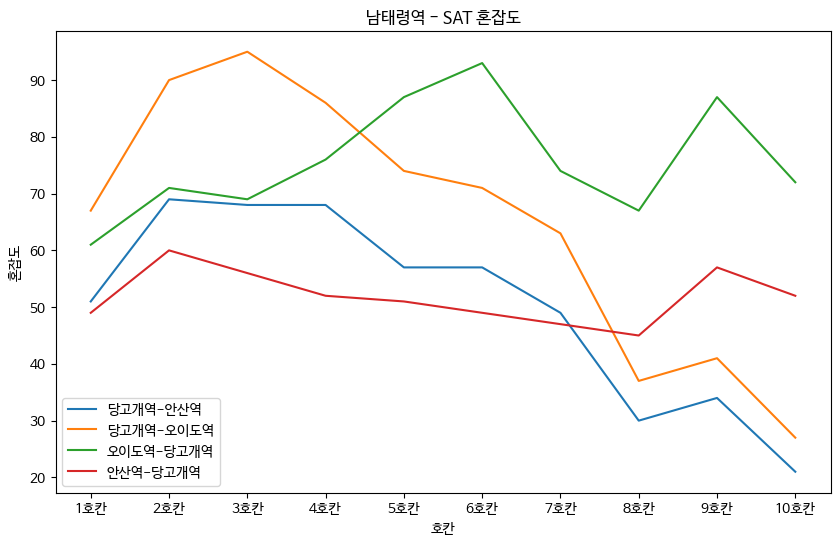

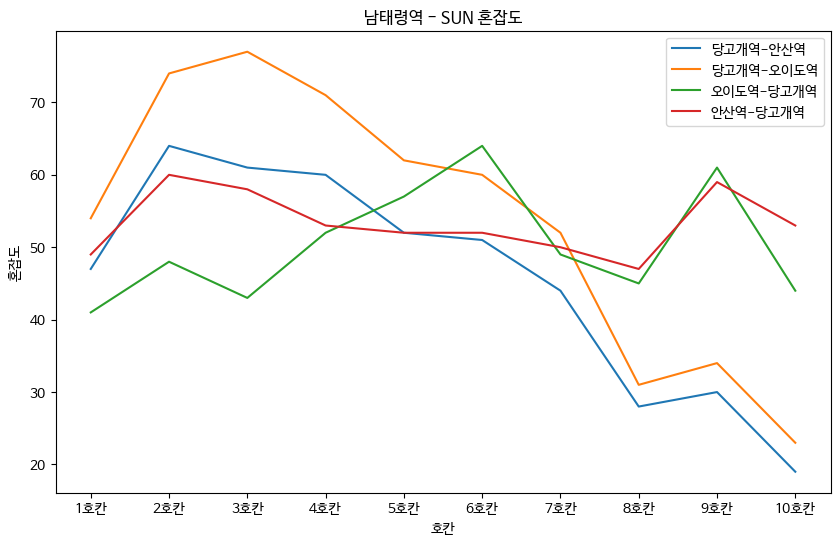

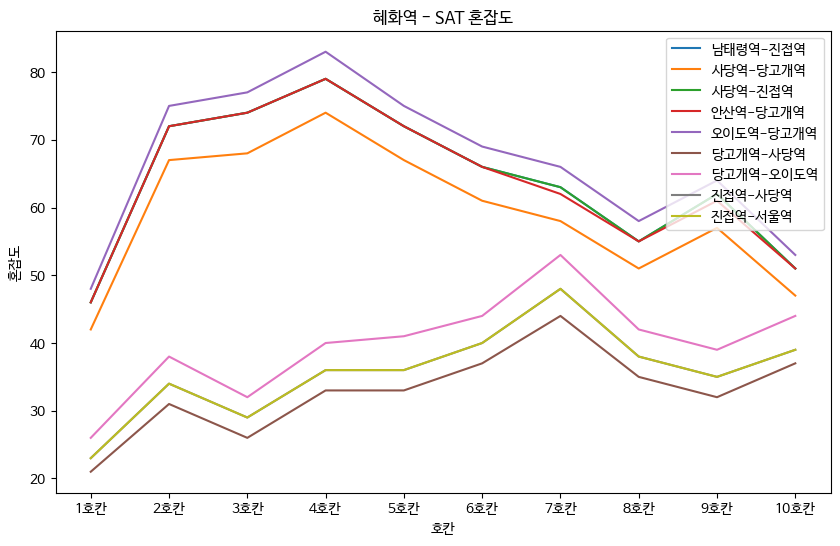

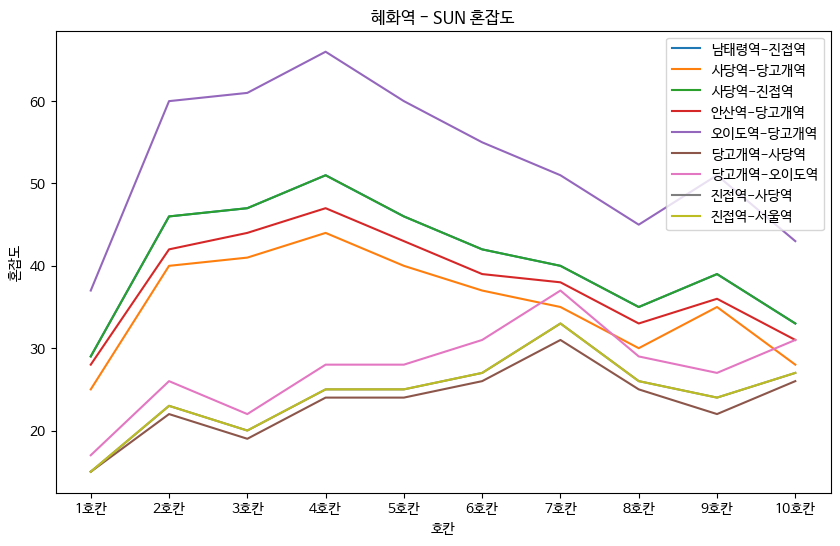

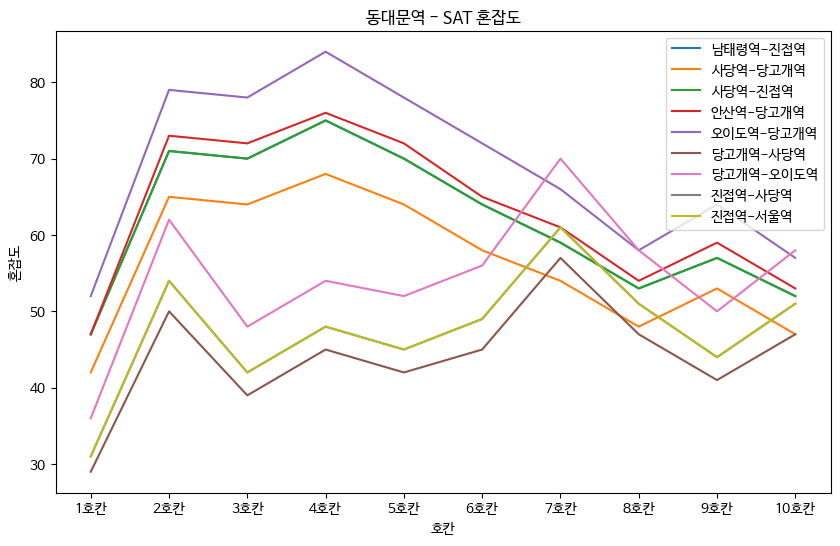

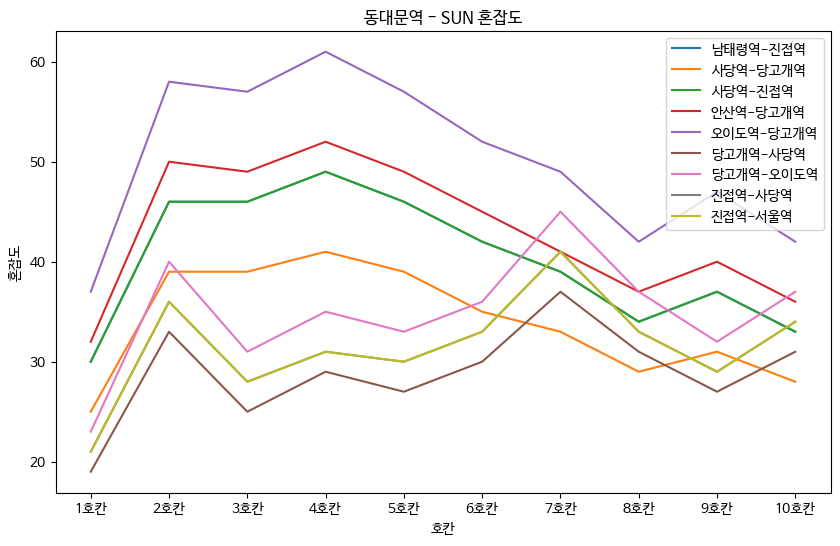

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 프레임 재구성
df_melted = result_df_all.melt(id_vars=['현재역', '출발역', '종착역', '이전역', '요일'], value_vars=['1호칸', '2호칸', '3호칸', '4호칸', '5호칸', '6호칸', '7호칸', '8호칸', '9호칸', '10호칸'], var_name='호칸', value_name='혼잡도')

# 현재역별로 데이터를 분리하여 그래프 생성
current_stations = df_melted['현재역'].unique()

# 요일 별로 그래프 생성
weekend = ['SAT', 'SUN']
for station in current_stations:
    for day in weekend:
        plt.figure(figsize=(10, 6))

        # 해당 역의 데이터만 필터링
        df_station = df_melted[(df_melted['현재역']==station) & (df_melted['요일']==day)]

        # 출발역-종착역의 유일한 값 리스트를 가져옴
        train_lines = df_station[['출발역', '종착역']].drop_duplicates().values.tolist()

        for line in train_lines:
            departure_station, destination_station = line
            # 해당 열차 라인의 데이터만 필터링
            df_line = df_station[(df_station['출발역']==departure_station) &
                                 (df_station['종착역']==destination_station)]

            # 각 열차 라인별로 그래프 그리기
            plt.plot(df_line['호칸'], df_line['혼잡도'], label=f'{departure_station}-{destination_station}')

        plt.xlabel('호칸')
        plt.ylabel('혼잡도')
        plt.title(f'{station} - {day} 혼잡도')
        plt.legend()
        plt.show()
